# Forest Data

In [1]:
#load the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
import seaborn as sns
from keras.layers import Input, Dense, concatenate, Dropout, Conv1D, MaxPooling1D
from keras.models import Model
from keras.utils import to_categorical
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model


Using TensorFlow backend.


In [2]:
np.set_printoptions(suppress = True)

## Load the dataset

In [3]:
#load path here where the datasets reside
path = '/home/brett/Documents/Datasets/ten-datasets/'

#load the dataset into a dataframe
df_forestdata = pd.read_csv(path + 'Forest.csv')

In [4]:
#labels are in the last column, features are in the other columns
Y = df_forestdata.iloc[:,54]
X = df_forestdata.iloc[:,0:54]

In [5]:
#get a summary of counts of class labels
Y.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [6]:
#create 80/20 train/test split in the data using sklearn
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size =0.2, random_state = 123, stratify=Y)
#create binary labels for MLPs
y_train_binary = to_categorical(y_train)
y_test_binary = to_categorical(y_test)

In [8]:
#function to generate the training/test curves
def plot_history(history):
    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')

    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [9]:
#model diagram function
def model_diagram(model):
    image_name = 'MLP.png'
    #plot_model(model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
    plot_model(model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
    plt.figure(figsize=(15,15))
    img = plt.imread(image_name)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [10]:
#standardise the data
mms = MinMaxScaler()
x_train_scaled = mms.fit_transform(x_train)
x_test_scaled = mms.fit_transform(x_test)

In [12]:
#standard parameters for the various NN architectures
batch_size = 64

In [12]:
batch_size = 64

### Four Layer Deep Model with Shallow Logistic Regression (1 layer, 1 neuron)
Using functional model

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 54)           0                                            
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 100)          5500        input_5[0][0]                    
__________________________________________________________________________________________________
dropout_17 (Dropout)            (None, 100)          0           dense_25[0][0]                   
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 100)          10100       dropout_17[0][0]                 
____________________________________________________________________________________________

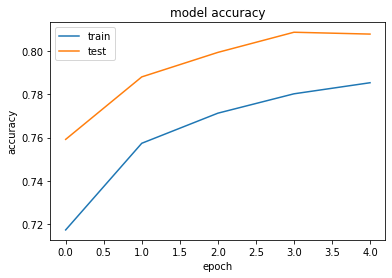

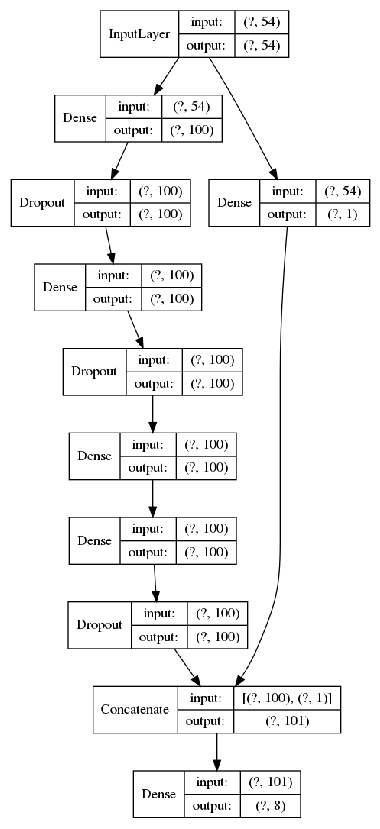

CPU times: user 9min 4s, sys: 7min 7s, total: 16min 12s
Wall time: 6min 50s


In [18]:
%%time


input_data = Input(shape=x_train_scaled.shape[1:])

#deep stream
deep_dense1 = Dense(100, activation='relu')(input_data)
deep_drop1 = Dropout(0.25)(deep_dense1)
deep_dense2 = Dense(100, activation='relu')(deep_drop1)
deep_drop2 = Dropout(0.25)(deep_dense2)
deep_dense3 = Dense(100, activation='relu')(deep_drop2)
deep_drop3 = Dropout(0.25)(deep_dense3)
deep_dense4 = Dense(100, activation='relu')(deep_dense3)
deep_drop4 = Dropout(0.25)(deep_dense4)

#shallow stream
shallow_dense1 = Dense(1, activation='relu')(input_data)

combined = concatenate([deep_drop4,shallow_dense1])


#result
result = Dense(y_train_binary.shape[1], activation='softmax')(combined)

# this model maps an input to its reconstruction
MLP = Model(input_data, result)


MLP.summary()


# compile model
MLP.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

#testing still improving after 10 epochs
hist = MLP.fit(x_train_scaled,y_train_binary,
                epochs=5,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test_scaled,y_test_binary))


test_scores = MLP.evaluate(x_test_scaled, y_test_binary, verbose=2)
print("Test accuracy:", test_scores[1])

plot_history(hist)
model_diagram(MLP)

### Deep MLP + Shallow MLP

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 54)           0                                            
__________________________________________________________________________________________________
dense_31 (Dense)                (None, 256)          14080       input_6[0][0]                    
__________________________________________________________________________________________________
dropout_21 (Dropout)            (None, 256)          0           dense_31[0][0]                   
__________________________________________________________________________________________________
dense_32 (Dense)                (None, 256)          65792       dropout_21[0][0]                 
____________________________________________________________________________________________

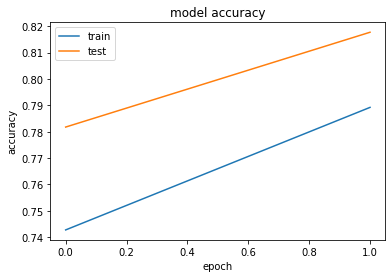

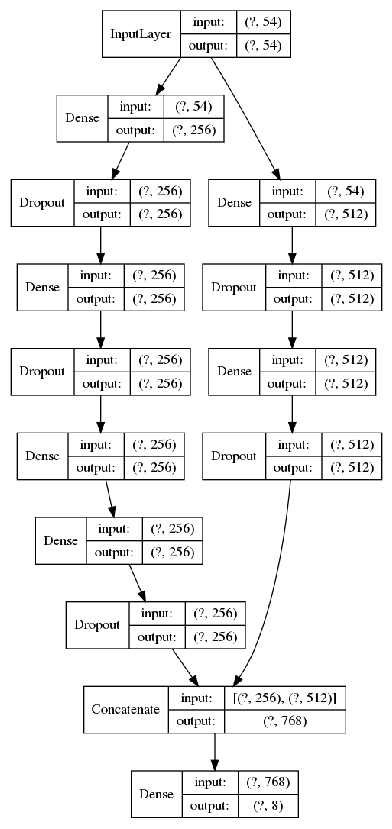

CPU times: user 15min 58s, sys: 10min 28s, total: 26min 26s
Wall time: 10min 52s


In [19]:
%%time


input_data = Input(shape=x_train_scaled.shape[1:])

#deep stream
deep_dense1 = Dense(256, activation='relu')(input_data)
deep_drop1 = Dropout(0.25)(deep_dense1)
deep_dense2 = Dense(256, activation='relu')(deep_drop1)
deep_drop2 = Dropout(0.25)(deep_dense2)
deep_dense3 = Dense(256, activation='relu')(deep_drop2)
deep_drop3 = Dropout(0.25)(deep_dense3)
deep_dense4 = Dense(256, activation='relu')(deep_dense3)
deep_drop4 = Dropout(0.25)(deep_dense4)

#shallow stream
shallow_dense1 = Dense(512, activation='relu')(input_data)
shallow_drop1 = Dropout(0.25)(shallow_dense1)
shallow_dense2 = Dense(512, activation='relu')(shallow_drop1)
shallow_drop2 = Dropout(0.25)(shallow_dense2)

combined = concatenate([deep_drop4,shallow_drop2])


#result
result = Dense(y_train_binary.shape[1], activation='softmax')(combined)

# this model maps an input to its reconstruction
MLP = Model(input_data, result)


MLP.summary()


# compile model
MLP.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

#testing still improving after 10 epochs
hist = MLP.fit(x_train_scaled,y_train_binary,
                epochs=2,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test_scaled,y_test_binary))


test_scores = MLP.evaluate(x_test_scaled, y_test_binary, verbose=2)
print("Test accuracy:", test_scores[1])


plot_history(hist)
model_diagram(MLP)